In [1]:
# Clear everything.
%reset -f

import random
import pandas
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn import linear_model, datasets, preprocessing
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime

# Configure matplotlib.
%matplotlib inline

# Login to plotly.
py.sign_in('severo', '32lck03rn2')

# Store some cool colors.
_colors = [ "#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
           "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87"]

In [2]:
# Import training data.
data = pandas.read_csv('data/train.csv', parse_dates=['Dates'])

# Sort rows by 'Dates' column.
data = data.sort(['Dates']).reset_index(drop = True)

# Create 'Count' column that will hold the number of occurences per district.
data['Count'] = data.groupby('PdDistrict').cumcount()

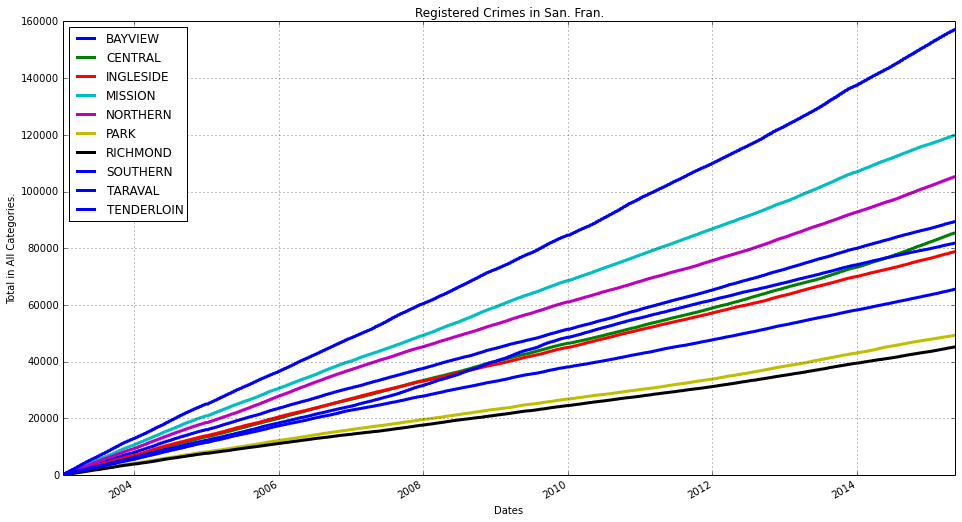

In [3]:
plt.title('Registered Crimes in San. Fran.')
plt.ylabel('Total in All Categories.')

legends = []
for group_tuple in data.groupby('PdDistrict'):
    group_data = group_tuple[1]
    group_data.plot(x='Dates', y='Count', figsize=(16,9), linewidth = 3)
    plt.legend(loc='upper left')
    
    # Save for legend
    legends.append(group_tuple[0])
plt.legend(legends, loc='best')
plt.show()